# Seminar 4

On this seminar, we will on Wi-Fi performance, specifically, how to address this topic using NNs


### Part 1 Data Visualization

,LocationNumber,RSSI,TxLinkSpeed,RxLinkSpeed,MainAPConnect,TxThroughput,AvgPingLatency
count,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000
mean,18.151161,-62.364212,491.264874,460.954107,0.913958,12.988920,54.771372
std,10.338002,9.442463,240.868700,251.600115,0.280430,4.413973,8.735672
min,1.000000,-79.040000,33.240000,-12.530000,0.000000,0.780000,39.300000
25%,9.000000,-70.360000,273.200000,249.127500,1.000000,11.320000,48.940000
50%,18.000000,-62.910000,476.635000,396.480000,1.000000,14.790000,52.290000
75%,27.000000,-53.790000,664.390000,656.422500,1.000000,15.980000,57.470000
max,36.000000,-37.020000,905.390000,911.000000,1.000000,19.160000,96.550000


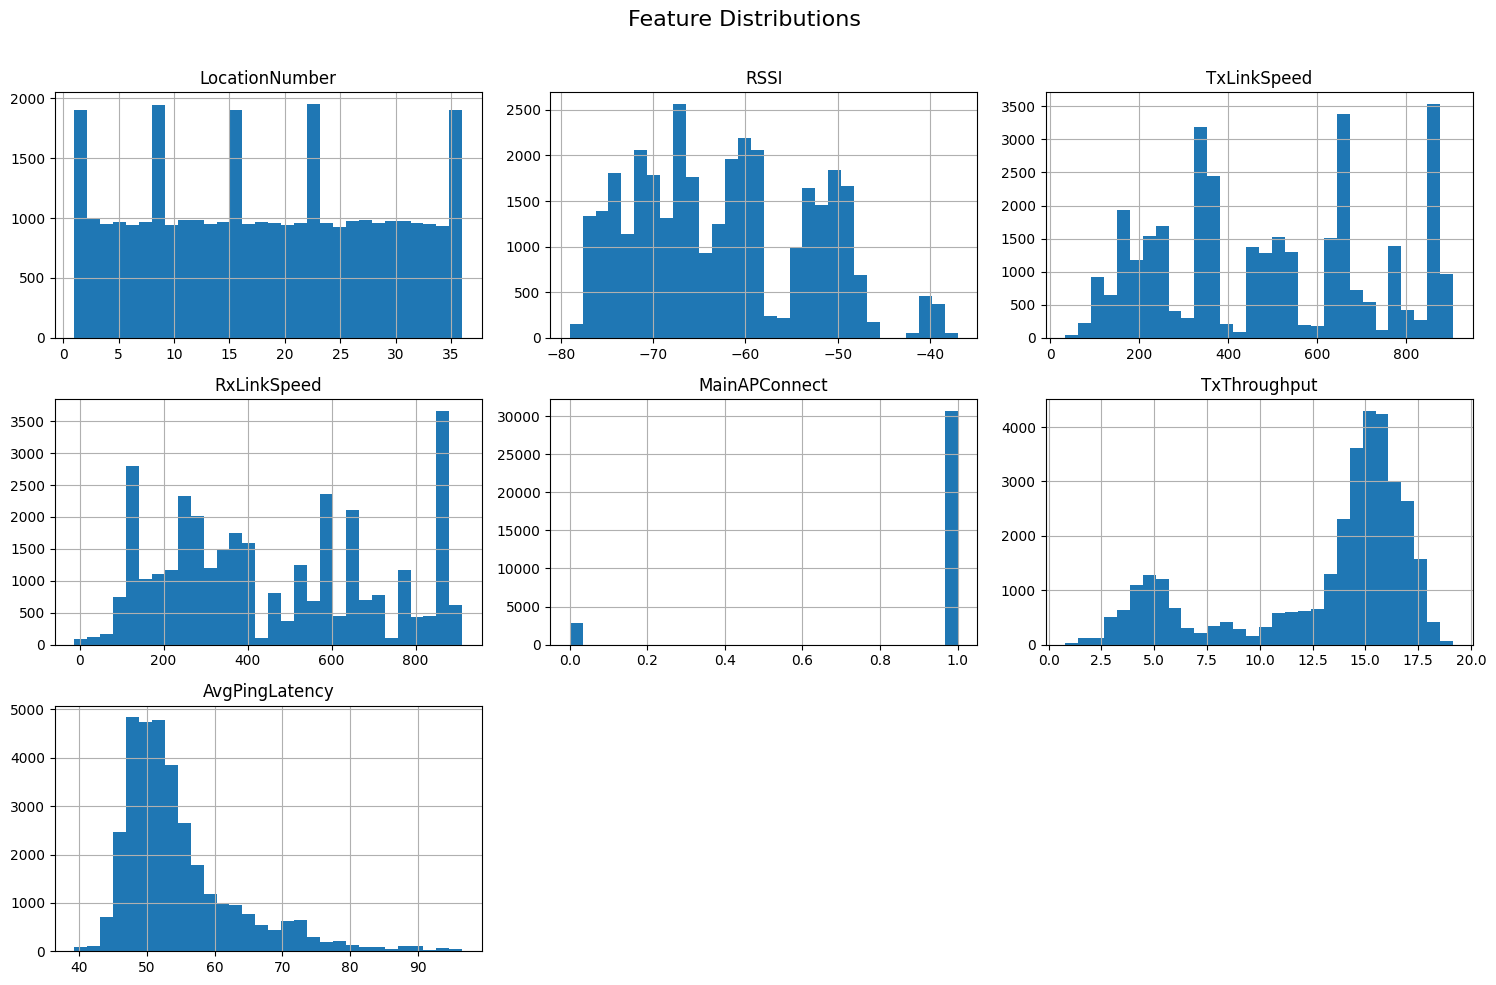

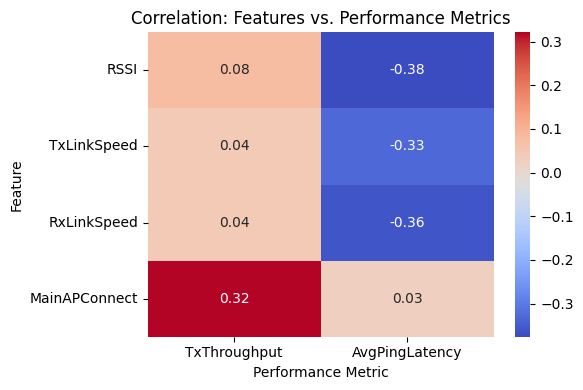

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df_test = pd.read_csv("test_data.csv")
df_train = pd.read_csv("train_data.csv")

# Show descriptive statistics
display(df_train.describe())

# Plot histograms for each feature
df_train.hist(bins=30, figsize=(15, 10), grid=True)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Select main features and performance metrics
features = ["RSSI", "TxLinkSpeed", "RxLinkSpeed", "MainAPConnect"]
performance = ["TxThroughput", "AvgPingLatency"]

# Compute correlation matrix between features and performance metrics
corr = df_train[features + performance].corr()

# Extract only correlations of features with performance metrics
corr_focus = corr.loc[features, performance]

# Plot the focused correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_focus, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation: Features vs. Performance Metrics")
plt.xlabel("Performance Metric")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



### Descriptive Statistics & Histograms

- Descriptive statistics provide initial insights into feature ranges and variability (e.g. `RSSI`: -79 to -37 dBm, `TxThroughput`: 0.78 to 19.16 Mbps).
- Histograms have been used to visualize the full distribution of each feature, revealing multimodal behaviors (e.g., `TxLinkSpeed`, `RxLinkSpeed`) and imbalances (e.g., `MainAPConnect` mostly equal to 1).
- This step ensures that the dataset contains sufficient diversity for meaningful training.

---

### Correlation Analysis

- We compute correlations between input features and the performance metrics (`TxThroughput`, `AvgPingLatency`).
- `MainAPConnect` shows moderate correlation with throughput (+0.32), while `RSSI`, `TxLinkSpeed`, and `RxLinkSpeed` correlated moderately with latency (around -0.33 to -0.38).
- No feature exhibits strong linear correlations, indicating that a non-linear model (FNN) is appropriate.





In [2]:
display(df_train.shape)

display(df_test.shape)

(33600, 7)

(8400, 7)

In [11]:
display(df_train.head())

,LocationNumber,RSSI,TxLinkSpeed,RxLinkSpeed,MainAPConnect,TxThroughput,AvgPingLatency
0,2,-72.32,163.11,118.36,1,13.51,51.79
1,32,-73.18,238.45,212.83,1,3.35,68.80
2,20,-40.67,865.44,863.39,1,17.62,50.79
3,10,-60.66,473.89,396.92,1,14.30,64.15
4,29,-67.96,479.74,355.99,1,4.81,73.81


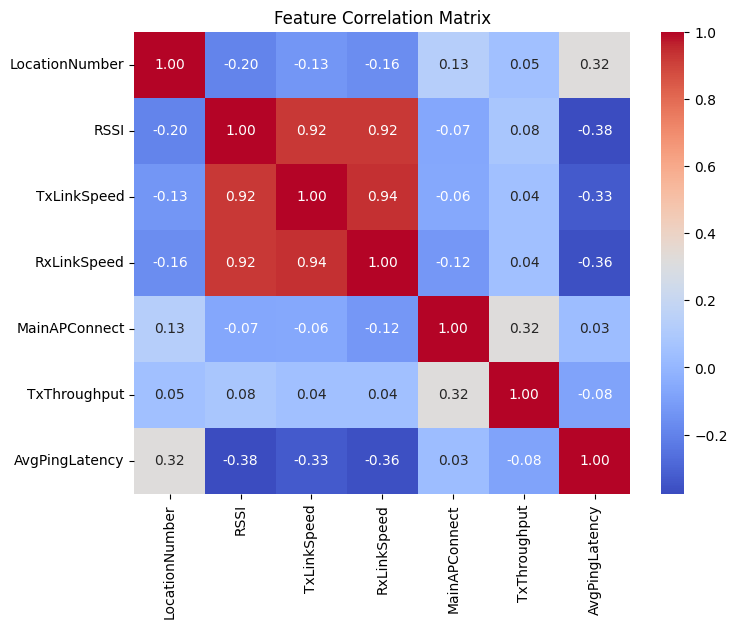

In [ ]:

# This can be useful for understanding relationships between all features

plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

the commentary on this matrix comes later, when discussing the chosen features


## Part 2 — FNN-Based Performance Predictor

### Goal

The objective of this part was to design and train a Feedforward Neural Network (FNN) capable of predicting two key performance metrics of the Wi-Fi system (TxThroughput and AvgPingLatency) based on a set of relevant features extracted from real-world residential Wi-Fi data.


In [5]:
# Feature selection for modeling

features = ["RSSI", "TxLinkSpeed", "RxLinkSpeed", "MainAPConnect"]
targets = ["TxThroughput", "AvgPingLatency"]

X_train = df_train[features]
y_train = df_train[targets]

X_test = df_test[features]
y_test = df_test[targets]

### Feature Selection and Justification

From the correlation analysis conducted in Part 1, we observed that:

- **RSSI, TxLinkSpeed, and RxLinkSpeed** show moderate to strong correlations with AvgPingLatency (negatively).
- **MainAPConnect** shows a moderate positive correlation with TxThroughput.
- Even though some features are weakly correlated with one of the two targets, together they still carry useful information.

Since all 4 features demonstrated some level of relevance with at least one target variable, we decided to keep **all 4 features** as inputs to our model:

- RSSI  
- TxLinkSpeed  
- RxLinkSpeed  
- MainAPConnect

The neural network was therefore designed to take these 4 features as input and output predictions for both:

- TxThroughput  
- AvgPingLatency

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the features (recommended for neural networks)
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)

# If you need to encode categorical variables, use OneHotEncoder or similar.
# In your case, 'MainAPConnect' is already 0/1, so no encoding is needed.

# Optionally, you can also scale the targets if you want (especially for regression)
from sklearn.preprocessing import MinMaxScaler
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)

# X_scaled is now ready for training your FNN

# Normalize the test set using the same scaler as the train set
X_test_scaled = x_scaler.transform(X_test)
y_test_scaled =y_scaler.transform(y_test)

### Data Preparation

Prior to training the neural network:

- **StandardScaler** was applied to normalize input features. This ensures that the optimizer operates efficiently, since all features are on comparable scales.
- **MinMaxScaler** was applied to normalize the output targets (both throughput and latency) into the range [0, 1]. This helps stabilize and accelerate learning during regression.

Normalization is a critical step in neural network training to avoid issues related to scale differences between input features and outputs.


In [ ]:
pip install tensorflow

Epoch 1/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0684 - mae: 0.1935 - val_loss: 0.0346 - val_mae: 0.1364
Epoch 2/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0332 - mae: 0.1350 - val_loss: 0.0332 - val_mae: 0.1360
Epoch 3/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0325 - mae: 0.1334 - val_loss: 0.0334 - val_mae: 0.1414
Epoch 4/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0326 - mae: 0.1334 - val_loss: 0.0329 - val_mae: 0.1337
Epoch 5/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0325 - mae: 0.1333 - val_loss: 0.0325 - val_mae: 0.1346
Epoch 6/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0323 - mae: 0.1324 - val_loss: 0.0323 - val_mae: 0.1352
Epoch 7/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0319 - mae: 0.1322 - val_loss: 0.0327 - val_mae: 0.1345
Epoch 8/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0312 - mae: 0.1299 - val_loss: 0.0321 - val_mae: 0.1336
Epoch 9/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - l

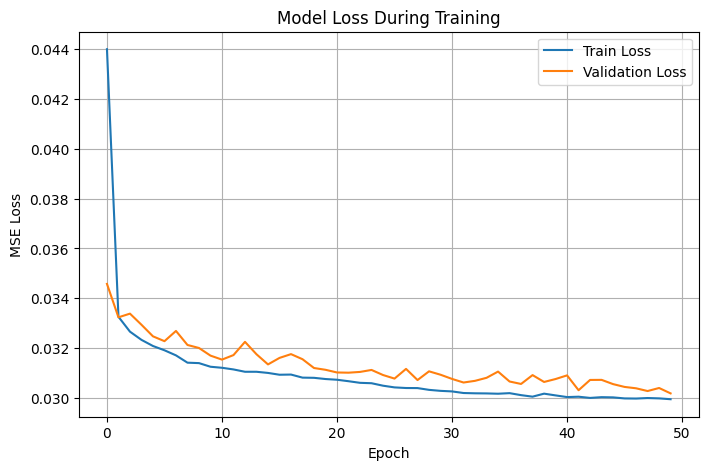

Final Training Loss: 0.0300
Final Validation Loss: 0.0302
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0298 - mae: 0.1253
Test loss: 0.030019450932741165
Test MAE: 0.12644484639167786


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build a simple FNN model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),   # 4 input features
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(y_train_scaled.shape[1])             # 2 outputs
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Loss During Training')
plt.legend()
plt.grid(True)
plt.show()

# Print final losses
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled)
print("Test loss:", test_loss)
print("Test MAE:", test_mae)

### Neural Network Architecture

The designed Feedforward Neural Network (FNN) consists of:

- Input layer: 4 input features.
- Hidden layers:  
  - Dense(16) with ReLU activation.  
  - Dense(8) with ReLU activation.
- Output layer: 2 neurons (for TxThroughput and AvgPingLatency), no activation (regression).

**Loss function**: Mean Squared Error (MSE), suitable for regression tasks.  
**Optimizer**: Adam, for its robustness and adaptive learning rate.  
**Metric**: Mean Absolute Error (MAE), to better interpret absolute prediction errors.

---

### Model Training

- Trained for **50 epochs** with batch size of 32.
- Used **20% of training data for validation**.
- Both **training and validation losses decrease steadily** during the first 20 epochs, with gradual convergence after epoch 30.
- No signs of overfitting were observed: training and validation losses remain very close throughout training.

#### Final training metrics:

- **Final Training Loss (MSE)**: ~0.0300  
- **Final Validation Loss (MSE)**: ~0.0302

These low and stable loss values suggest that the model has successfully captured key relationships between the input features and the target metrics.


In [17]:
# Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE (original scale):", mean_absolute_error(y_true, y_pred))
print("MSE (original scale):", mean_squared_error(y_true, y_pred))

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
MAE (original scale): 4.17482823765334
MSE (original scale): 33.3080541261168


### Test Set Evaluation

The model was then evaluated on the completely unseen test set to assess its generalization capability — that is, how well it performs when applied to new data outside of the training distribution.

- **Test Loss (MSE)**: 0.0300  
- **Test MAE**: 0.1264 (in normalized scale)

When rescaled back to original units:

- **MAE (original scale)**: ~4.17  
- **MSE (original scale)**: ~33.31

#### Interpretation:

- The mean absolute error of approximately **4.17 units** suggests that, on average, the predicted values deviate by around 4 units from the true values. Given the range of the targets (TxThroughput values ranging roughly between 0 and ~20, and AvgPingLatency between 40 and 90), this level of error can be considered moderate but acceptable for practical applications.
- The reasonably low test loss confirms that the model is able to generalize well to new samples and is not overfitting the training data.
- As expected for real-world Wi-Fi data, some noise and variability remain, which limits the achievable precision — especially since the model relies on just four input features and cannot capture all external factors affecting Wi-Fi performance.
- These results show that, despite the inherent complexity and randomness of wireless environments, the neural network has successfully extracted useful relationships between input features and performance metrics.


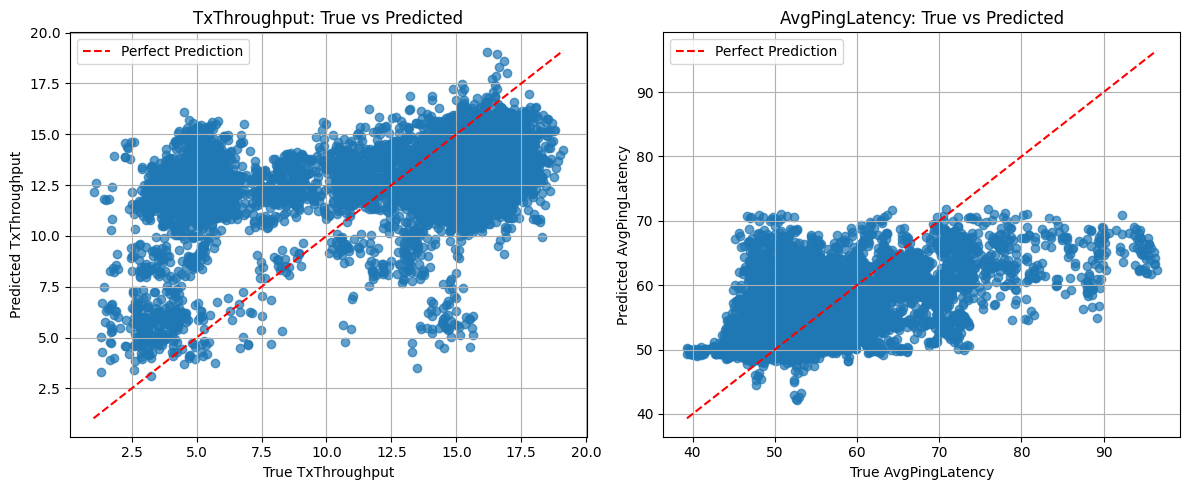

In [20]:
plt.figure(figsize=(12,5))

# TxThroughput
plt.subplot(1,2,1)
plt.scatter(y_true[:,0], y_pred[:,0], alpha=0.7)
min_val = min(y_true[:,0].min(), y_pred[:,0].min())
max_val = max(y_true[:,0].max(), y_pred[:,0].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.xlabel("True TxThroughput")
plt.ylabel("Predicted TxThroughput")
plt.title("TxThroughput: True vs Predicted")
plt.legend()
plt.grid(True)

# AvgPingLatency
plt.subplot(1,2,2)
plt.scatter(y_true[:,1], y_pred[:,1], alpha=0.7)
min_val = min(y_true[:,1].min(), y_pred[:,1].min())
max_val = max(y_true[:,1].max(), y_pred[:,1].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.xlabel("True AvgPingLatency")
plt.ylabel("Predicted AvgPingLatency")
plt.title("AvgPingLatency: True vs Predicted")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Predictions Visualization

To visualize prediction accuracy, we plotted true vs predicted values for both targets:

#### TxThroughput:

- The majority of predictions are close to the perfect prediction line.
- Some spread is observed, suggesting that while the model captures general trends, it struggles with exact predictions at higher throughput values.

#### AvgPingLatency:

- Similar behavior as throughput: good alignment at lower latencies, slightly more scattered predictions at higher latencies.
- Overall, predictions remain close to the true values.

These plots confirm that the model has **learned meaningful relationships** in the data, though some variability remains (expected due to noise and complexity of Wi-Fi systems).

In [19]:
from sklearn.metrics import r2_score
print("R2 TxThroughput:", r2_score(y_true[:,0], y_pred[:,0]))
print("R2 AvgPingLatency:", r2_score(y_true[:,1], y_pred[:,1]))

R2 TxThroughput: 0.214903207285302
R2 AvgPingLatency: 0.3310469866784509


### R² Scores — Model Explanatory Power

Finally, the coefficient of determination (R²) was computed:

| Metric         | R² Score |
|----------------|----------|
| TxThroughput   | 0.215    |
| AvgPingLatency | 0.331    |

- The R² values indicate that the model explains approximately **21.5% of the variance in throughput** and **33.1% of the variance in latency**.
- While these values may seem modest, they are reasonable given the inherent noise, variability, and external factors affecting real-world Wi-Fi performance.
- It's important to highlight that predicting Wi-Fi performance is a complex task influenced by many uncontrolled factors (e.g. interference, device types, user behavior), and perfect prediction is practically impossible.


### Final Commentary
### Global Reflection and Impact of the Task

- **Why neural networks?**  
  Neural networks were chosen because linear models previously tested (Seminar 1) were limited in capturing the non-linear relationships present in real-world Wi-Fi systems. FNNs allow us to model these more complex dependencies between features and performance metrics.

- **Why multi-output regression?**  
  Since throughput and latency are interconnected and arise from the same physical phenomena, predicting both simultaneously can allow the network to capture shared patterns more effectively.

- **Why normalization?**  
  Normalizing both inputs and outputs stabilizes training and allows the neural network to learn efficiently across different feature scales.

- **Overall task impact**:  
  This task demonstrates how modern machine learning models like neural networks can provide practical insights into network behavior, even in noisy real-world scenarios where perfect models are unattainable. Despite modest R² scores, the model achieves **reasonable predictions** that can be useful for network monitoring, optimization, and decision support.

---

### Potential Improvements for Future Work

- Use temporal features (sequential measurements).
- Explore more complex models: recurrent networks, transformers, etc.
- Include external features (number of users, time of day, interference sources).
- Perform hyperparameter tuning (architecture, learning rates, batch sizes).

